In [ ]:
!cd /work/hpc/potato/airc

In [1]:
!export HYDRA_FULL_ERROR=1

In [2]:
from omegaconf import DictConfig
import hydra
import rootutils
rootutils.setup_root(search_from=".", indicator='setup.py', pythonpath=True)

PosixPath('/work/hpc/potato/airc')

In [13]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
with hydra.initialize(version_base="1.3", config_path="../configs", ):
    cfg = hydra.compose(config_name='train.yaml')
    print(cfg)

{'task_name': 'train', 'tags': ['dev'], 'train': True, 'test': True, 'ckpt_path': None, 'seed': None, 'data': {'pool': {'_target_': 'src.data.components.river_dataset.RiverDataPool', 'data_path': '${paths.data_dir}/v2', 'train_path': '${paths.data_dir}/dataset/v2/train', 'val_path': '${paths.data_dir}/dataset/v2/val', 'seed': None, 'sample_size': 512, 'label_ratio': 0.7, 'patch_size': [512, 512], 'temporal': False, 'augment': {'shear_range': 0.5, 'rotate_range': 3.14, 'scale_range': 0.3, 'flip_ratio': 0.5, 'shuffle_ratio': 0.5}, 'val_center': None, 'val_ratio': 0.1, 'checkpoint_path': None, 'max_samples_per_class': None, 'num_workers': 4, 'deterministic': False}, 'transform': {'_target_': 'albumentations.Compose', 'transforms': [{'_target_': 'albumentations.RandomBrightnessContrast', 'brightness_limit': 0.1, 'contrast_limit': 0.1, 'p': 0.7}, {'_target_': 'albumentations.HueSaturationValue', 'hue_shift_limit': 5, 'sat_shift_limit': 10, 'val_shift_limit': 10, 'p': 0.5}, {'_target_': 'alb

In [4]:
datamodule = hydra.utils.instantiate(cfg.data)

Examining label:: 100%|██████████| 9/9 [00:17<00:00,  1.89s/it]


[4826 1022] [1965 1136]
Label_flat shape (22343898,)
Label_flat shape (22343898,)


In [5]:
datamodule.setup()

In [33]:
dataloader = datamodule.val_dataloader()

In [34]:
loader = iter(dataloader)

In [35]:
batch = next(loader)

In [36]:
mean=np.array([0.485, 0.456, 0.406])[None, :, None, None]
var=np.array([0.229, 0.224, 0.225])[None, :, None, None]

In [62]:
image = batch['image']

In [63]:
image = image * var + mean

In [64]:
# image = np.interp(image, [image.min(), image.max()], [0, 1])
image = np.clip(image, 0, 1)

In [65]:
import torchvision.transforms.functional as F

In [67]:
img = F.to_pil_image(image[0])

In [59]:
img = np.transpose(image[0], axes=[1, 2, 0])

In [60]:
img.shape

(1964, 1136, 3)

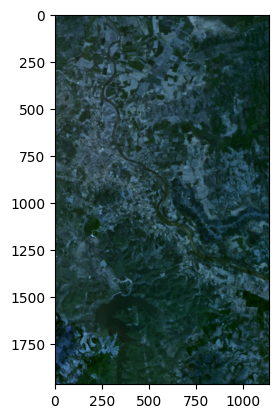

In [68]:
plt.imshow(img)